<a href="https://colab.research.google.com/github/Hutaf/SDA-Machine-Learning/blob/main/Assignment_LinearRegression_ML8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Linear Regression
Using the same seattle weather data as last chapter develop a linear regression model

In [40]:
#import the pakcages that we will need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [41]:
filepath = 'https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_4_ML/data/seattle_weather_1948-2017.csv'
df = pd.read_csv(filepath)

numrows = 25549 # can be as large as 25549

#create an empty dataframe to hold values
regression_df = pd.DataFrame({'intercept':[1] * numrows,
                             'today':[0.0] * numrows,
                             'tomorrow':[0.0] * numrows})

#sort columns for convience
seq = ['intercept',
       'today',
       'tomorrow']
regression_df = regression_df.reindex(columns=seq)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [43]:
df.head(10)

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
5,1948-01-06,0.44,48,39,True
6,1948-01-07,0.41,50,40,True
7,1948-01-08,0.04,48,35,True
8,1948-01-09,0.12,50,31,True
9,1948-01-10,0.74,43,34,True


In [44]:
for i in range(0 , numrows):
    tomorrow = df.iloc[i,1]
    today = df.iloc[(i-1),1]
    regression_df.iat[i,2] = tomorrow
    regression_df.iat[i,1] = today

regression_df = regression_df.dropna() #exclude any rows with missing data

In [45]:
#this makes a simple dataframe with a relationship that we can now plot
regression_df.describe()

,intercept,today,tomorrow
count,25544.0,25544.000000,25544.000000
mean,1.0,0.106238,0.106238
std,0.0,0.239046,0.239046
min,1.0,0.000000,0.000000
25%,1.0,0.000000,0.000000
50%,1.0,0.000000,0.000000
75%,1.0,0.100000,0.100000
max,1.0,5.020000,5.020000


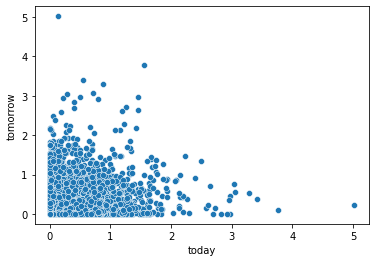

In [46]:
sns.scatterplot(x='today',y='tomorrow',data=regression_df)

Creating a basic linear model to best predict these values. Start with a slope and intercept values of 1 and then iterate through gradient descent.

In [47]:
def gradientDescent(X, y, param, alpha, num_iters):
    """
       Performs gradient descent to learn param
    """
    for i in range(num_iters):
        y_hat = np.dot(X, param) # notice we use numpy here to efficently calculate the values
        param = param - alpha * np.dot(X.T, y_hat-y)
    return param

In this fucntion *param* is the initial guess of the values of the linear function and 
*X* is the vector of data values and y is the realization

In [48]:
X = regression_df.iloc[0:200:,0:2]
y = regression_df.iloc[0:200:,2]
param = np.array([1,1])
alpha = 0.0001
num_iters = 1000

solution = gradientDescent(X, y, param, alpha, num_iters)
solution

array([0.08116008, 0.33987798])

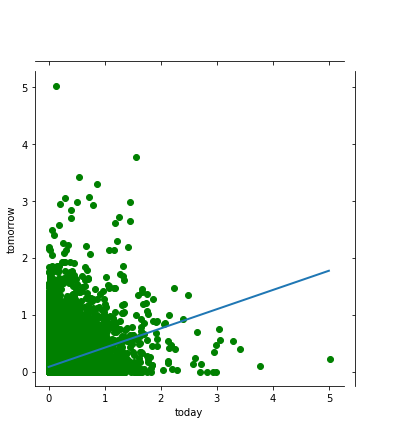

In [49]:
grid = sns.JointGrid(x=regression_df.today,y=regression_df.tomorrow)
grid.plot_joint(plt.scatter, color="g")
plt.plot([0, 5], [0.0811, 1.77], linewidth=2)

However, building models from scratch is hard! Lucky for us there is a very popular library that trains models for us!

In [50]:
from sklearn import linear_model
#modify the data to work with this library
x = regression_df.today.values
y = regression_df.tomorrow.values
x = x.reshape(regression_df.shape[0], 1)
y = y.reshape(regression_df.shape[0], 1)

In [51]:
mymodel = linear_model.LinearRegression().fit(x,y)

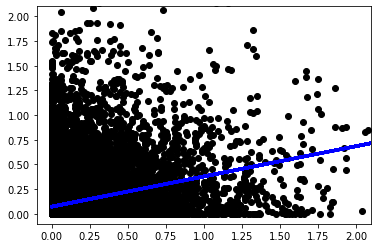

In [52]:
plt.scatter(x, y,  color='black')
plt.plot(x, mymodel.predict(x), color='blue', linewidth=3)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
plt.show()

In [53]:
# using the r2 (pronounced r squared) value we can get a basic measure of model quality
from sklearn.metrics import r2_score
r2_score(y,mymodel.predict(x))

0.0936792792728317

We can plot the difference between the predictions and the actual values for a visual estimate of performance. A perfect model would result in this being a straight line with a slope of 1. Notice how the model predicts only lower values, meaning that it tends to under predict the actual amount of rain.

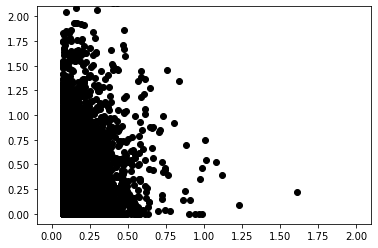

In [54]:
plt.scatter(mymodel.predict(x), y,  color='black')
plt.xlim(-0.1,2.1) #to keep the same scale as the previous plot
plt.ylim(-0.1,2.1) # same reason as xlim
plt.show()

### From this point modify the scikit-learn linear regression method to use two variables.
Hint. Your x values should have the same number of rows but two columns. You will not be able to plot the line (as it will be 3 dimensional) but you can plot the model predictions agains the actual values.

In [55]:
numrows = 25547 

regression_df = pd.DataFrame({'yesterday':[0.0]*numrows,
                              'today':[0.0]*numrows,
                              'tomorrow':[0.0]*numrows})

#sort columns for convience
seq = ['yesterday',
       'today',
       'tomorrow']

regression_df = regression_df.reindex(columns=seq)

for z in range(0 , numrows):
    i = z + 2  
    tomorrow = df.iloc[i,1]
    today = df.iloc[(i-1),1]
    yesterday = df.iloc[(i-2),1]

    regression_df.iat[z,0] = today
    regression_df.iat[z,1] = yesterday
    regression_df.iat[z,2] = tomorrow


regression_df = regression_df.dropna() #exclude any rows with missing data

In [56]:
#this makes a simple dataframe with a relationship that we can now plot
regression_df.describe()

,yesterday,today,tomorrow
count,25540.000000,25540.000000,25540.000000
mean,0.106236,0.106255,0.106213
std,0.239052,0.239061,0.239033
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.100000,0.100000,0.100000
max,5.020000,5.020000,5.020000


In [59]:
regression_df.head(10)

,yesterday,today,tomorrow
0,0.59,0.47,0.42
1,0.42,0.59,0.31
2,0.31,0.42,0.17
3,0.17,0.31,0.44
4,0.44,0.17,0.41
5,0.41,0.44,0.04
6,0.04,0.41,0.12
7,0.12,0.04,0.74
8,0.74,0.12,0.01
9,0.01,0.74,0.00


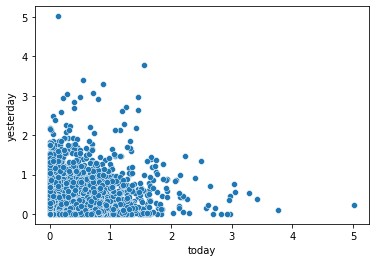

In [57]:
sns.scatterplot(x='today',y='yesterday',data=regression_df)

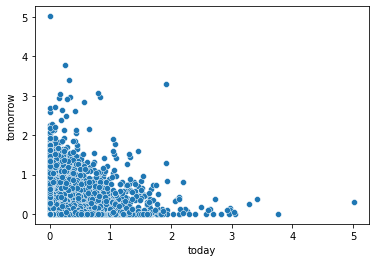

In [58]:
sns.scatterplot(x='today',y='tomorrow',data=regression_df)

In [61]:
from sklearn import linear_model
#modify the data to work with this library
y = regression_df['tomorrow']
X = regression_df.drop(columns=['tomorrow'], axis=1)

In [62]:
reg = linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

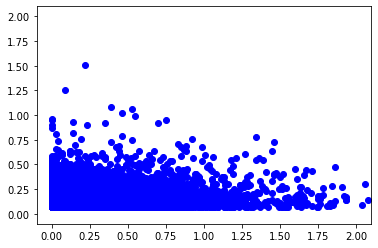

In [66]:
plt.scatter(y, reg.predict(X), color='blue')
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
plt.show()

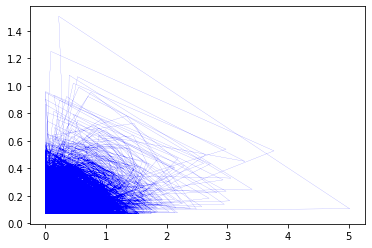

In [68]:
plt.plot(y, reg.predict(X), color='blue', linewidth=0.1)